**OBJECTIVE:** Analyse collected data of London and other cities

**AUTHOR:** Joshua Xu

**LAST EDITED:** 2024-10-26

---


# Data Analysis

In this notebook, I will be using the data I have collected to conduct some exploratory data anlaysis, primarily using the panda module.

In [108]:
import json
import requests
import pandas as pd
import matplotlib

## 1. Preparation

We begin by converting our data in a data frame to have a better understanding of our given data:

In [109]:
with open('../Data/all_data.json') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df

,London,Porto Novo,Kigali,Apia,Tiraspol,Dublin,Ljubljana,Kuwait City,Bangkok,Santo Domingo,Brasiléia
Date,"[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0..."
Weather code,"[53, 51, 53, 51, 51, 53, 55, 53, 51, 61, 61, 5...","[2, 2, 1, 3, 3, 3, 1, 1, 1, 1, 2, 3, 2, 1, 1, ...","[2, 2, 51, 51, 61, 2, 51, 3, 51, 63, 63, 63, 5...","[53, 61, 63, 63, 65, 65, 63, 63, 63, 55, 2, 61...","[1, 0, 3, 3, 51, 51, 71, 71, 51, 51, 3, 71, 3,...","[53, 3, 63, 51, 61, 53, 53, 55, 3, 63, 73, 53,...","[3, 3, 51, 51, 3, 3, 3, 55, 63, 51, 3, 51, 61,...","[1, 3, 3, 61, 3, 0, 0, 2, 63, 51, 0, 0, 53, 61...","[1, 2, 3, 3, 1, 3, 3, 3, 3, 63, 51, 51, 51, 51...","[51, 53, 51, 51, 63, 63, 65, 63, 63, 63, 61, 5...","[63, 51, 51, 63, 63, 51, 3, 51, 61, 63, 63, 61..."
Precipitation sum,"[4.0, 0.2, 3.2, 0.9, 0.1, 1.2, 5.0, 1.8, 0.3, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.1, 1.5, 2.7, 0.0, 0.1, 0.0, 0.2, ...","[2.2, 9.8, 8.3, 22.2, 44.8, 171.2, 40.3, 16.6,...","[0.0, 0.0, 0.0, 0.0, 0.3, 0.2, 0.2, 1.4, 0.6, ...","[1.3, 0.0, 16.7, 0.2, 4.9, 1.5, 2.0, 1.1, 0.0,...","[0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 3.5, 20.0,...","[0.0, 0.0, 0.0, 10.5, 0.0, 0.0, 0.0, 0.0, 27.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.8, 2.2, 1.5, 0.1, 11.2, 16.2, 17.1, 8.2, 9....","[10.1, 0.1, 0.8, 11.4, 27.0, 0.5, 0.0, 0.2, 3...."
Rain sum,"[4.0, 0.2, 3.2, 0.9, 0.1, 1.2, 5.0, 1.8, 0.3, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.1, 1.5, 2.7, 0.0, 0.1, 0.0, 0.2, ...","[2.2, 9.8, 8.3, 22.2, 44.8, 171.2, 40.3, 16.6,...","[0.0, 0.0, 0.0, 0.0, 0.3, 0.2, 0.0, 0.0, 0.6, ...","[1.3, 0.0, 16.7, 0.2, 4.9, 1.5, 2.0, 1.1, 0.0,...","[0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 3.5, 20.0,...","[0.0, 0.0, 0.0, 10.5, 0.0, 0.0, 0.0, 0.0, 27.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.8, 2.2, 1.5, 0.1, 11.2, 16.2, 17.1, 8.2, 9....","[10.1, 0.1, 0.8, 11.4, 27.0, 0.5, 0.0, 0.2, 3...."
Shower sum,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Precipitation hours,"[12.0, 2.0, 14.0, 5.0, 1.0, 3.0, 11.0, 8.0, 2....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 6.0, 7.0, 0.0, 1.0, 0.0, 1.0, ...","[10.0, 17.0, 17.0, 23.0, 22.0, 24.0, 24.0, 23....","[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 13.0, 6.0,...","[5.0, 0.0, 18.0, 1.0, 7.0, 3.0, 6.0, 1.0, 0.0,...","[0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 12.0, 24.0...","[0.0, 0.0, 0.0, 22.0, 0.0, 0.0, 0.0, 0.0, 15.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.0, 9.0, 8.0, 1.0, 9.0, 12.0, 14.0, 9.0, 9.0...","[8.0, 1.0, 4.0, 10.0, 22.0, 2.0, 0.0, 2.0, 4.0..."


We can now go about answering the question: **Is London really as rainy as the movies make it out to be?*** by answering the following questions...

## 2.1 Is rain the most common daily weather in London?

To answer this, we can explore the *Weather code* Row - Using [WMO Weather Interpretation Codes Guide](https://open-meteo.com/en/docs), we can see that:


| Code | Description |
| -------- | ------- |
| 0  | Clear Sky |
| 1, 2, 3 | Mainly clear, partly cloudy, and overcast |
| 45, 48    | Fog and depositing rime fog |
| 51, 53, 55    | Drizzle: Light, moderate, and dense intensity |
| 56, 57    | Freezing Drizzle: Light and dense intensity |
| 61, 63, 65    | Rain: Slight, moderate and heavy intensity |
| 66, 67    | Freezing Rain: Light and heavy intensity |
| 71, 73, 75    | Snow fall: Slight, moderate, and heavy intensity |
| 77    | Snow grains |
| 80, 81, 82    | Rain showers: Slight, moderate, and violent |
| 85, 86    | Snow showers slight and heavy |
| 95  *  | Thunderstorm: Slight or moderate |
| 96  *  | Thunderstorm with slight and heavy hail |


(*) Thunderstorm forecasts with hail is only available in central Europe 


Let's create a function to sort the date for weather code in London into different catogories:

In [110]:
# Defining function to catogorise weather code
def weather_code_classify(list: list):

    # Defining different levels of rain
    moderate_rain = [51, 53, 56, 61, 63, 66, 80, 81]
    heavy_rain = [55, 57, 65, 67, 82, 95, 96]

    # Defining weather catogories
    rain = light_rain + moderate_rain + heavy_rain
    snow = [71, 73, 75, 77, 85, 86]
    others = [0, 1, 2, 3, 45, 48]

    # Creating empty lists to sort data into
    moderate_rain_data = []
    heavy_rain_data = []
    snow_data = []
    others_data = []

    for i in list:
        if i in moderate_rain:
            moderate_rain_data.append(i)
        if i in heavy_rain:
            heavy_rain_data.append(i)
        if i in snow:
            snow_data.append(i)
        if i in others:
            others_data.append(i)
        else:
            pass

    rain_data = moderate_rain_data + heavy_rain_data
    
    dict = {
        'Light to Moderate Rain': len(moderate_rain_data),
        'Heavy Rain': len(heavy_rain_data),
        'Snow': len(snow_data),
        'Total Rain': len(rain_data),
        'Others': len(others_data)
    }
    
    return dict

We can now use this function to apply to our data frame:

In [111]:
weather_code_classify(df['London']['Weather code'])

{'Light to Moderate Rain': 204,
 'Heavy Rain': 19,
 'Snow': 6,
 'Total Rain': 223,
 'Others': 137}

Applying this function to all countries, we can construct a sub data frame for analysis and visualisation:

In [112]:
# Applying to this function to all entries in the 'Weather code' row of the data frame
WC = df.loc['Weather code'].apply(weather_code_classify)

# Constructing sub data frame with appropriate columns and rows
dfWC = pd.DataFrame(WC.tolist(), index=WC.index)
dfWC


,Light to Moderate Rain,Heavy Rain,Snow,Total Rain,Others
London,204,19,6,223,137
Porto Novo,62,0,0,62,304
Kigali,223,28,0,251,115
Apia,304,30,0,334,32
Tiraspol,123,14,19,137,210
Dublin,255,15,11,270,85
Ljubljana,159,21,24,180,162
Kuwait City,37,5,0,42,324
Bangkok,224,36,0,260,106
Santo Domingo,304,44,0,348,18


Data Visualisation can be found [here](../DataVisualisation.ipynb).

We can visualise this data to give us a better understanding, e.g., London's porportion of yearly porportion of rain can be visualised suitably using a pie chart:

<Axes: ylabel='London'>

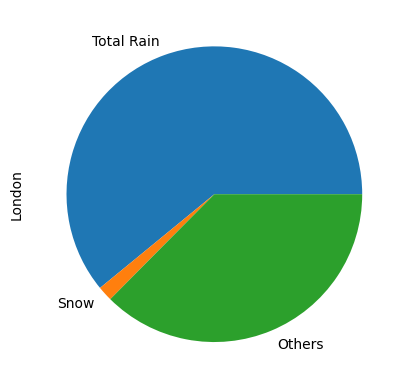

In [127]:
# Selecting Londnn data
london_rain_others = dfWC.loc[['London'],['Total Rain', 'Snow', 'Others']]
london_rain_others.loc['London'].plot.pie()

We can now compare the weather data across all capital cities using bar charts:

<Axes: >

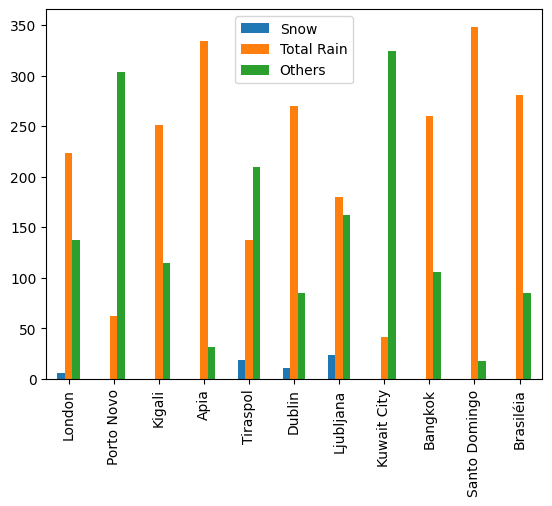

In [126]:
rain_others = dfWC.iloc[:,2:5]
rain_others.plot.bar()


Cool!